In [2]:
import tensorflow as tf

print(tf.__version__)

2.2.0


# Loading the data

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


base = '../input/face-expression-recognition-dataset/images/'

train_dir = os.path.join(base, 'train')
valid_dir = os.path.join(base, 'validation')

train_datagen = ImageDataGenerator(
    rescale=1./255
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=16,
    class_mode='categorical'
)

valid_dataset = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(48,48),
    batch_size=16,
#     color_mode='grayscale',
    class_mode='categorical'
)

input_shape = (48,48,3)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Function for training, 
we often training with different model, so it is better to define a function which can define how the training works and the feedback that we expect in a single function

In [22]:
import matplotlib.pyplot as plt

def train(model, train_dataset, valid_dataset, epoch=15):
    history = model.fit_generator(
              train_dataset,
              epochs=epoch,
              validation_data=valid_dataset
    )

    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['acc'], label='Training Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

# Model Definition

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer='RMSProp',
    loss='categorical_crossentropy',
    metrics = ['acc']
)

model.summary()

In [ ]:
train(model, train_dataset, valid_dataset)

In [ ]:
model.save('basic_cnn.h5')

## Basic CNN with drop out

In [23]:
cnn_do = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    # 1024 neuron hidden layer
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(7, activation='softmax')
])

opt = tf.keras.optimizers.RMSprop(lr=1e-4)

cnn_do.compile(
    optimizer='RMSProp',
    loss='categorical_crossentropy',
    metrics = ['acc']
)

cnn_do.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 46, 46, 16)        448       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 64)         

Epoch 1/50
1802/1802 [==============================] - 99s 55ms/step - loss: 1.7077 - acc: 0.3117 - val_loss: 1.5976 - val_acc: 0.3964
Epoch 2/50
1802/1802 [==============================] - 75s 41ms/step - loss: 1.5652 - acc: 0.3958 - val_loss: 1.5381 - val_acc: 0.4175
Epoch 3/50
1802/1802 [==============================] - 74s 41ms/step - loss: 1.5272 - acc: 0.4134 - val_loss: 1.5230 - val_acc: 0.4299
Epoch 4/50
1802/1802 [==============================] - 75s 42ms/step - loss: 1.5103 - acc: 0.4179 - val_loss: 1.4304 - val_acc: 0.4503
Epoch 5/50
1802/1802 [==============================] - 74s 41ms/step - loss: 1.5183 - acc: 0.4189 - val_loss: 1.4392 - val_acc: 0.4486
Epoch 6/50
1802/1802 [==============================] - 74s 41ms/step - loss: 1.5244 - acc: 0.4146 - val_loss: 1.4190 - val_acc: 0.4690
Epoch 7/50
1802/1802 [==============================] - 75s 41ms/step - loss: 1.5275 - acc: 0.4140 - val_loss: 1.4281 - val_acc: 0.4588
Epoch 8/50
1802/1802 [==========================

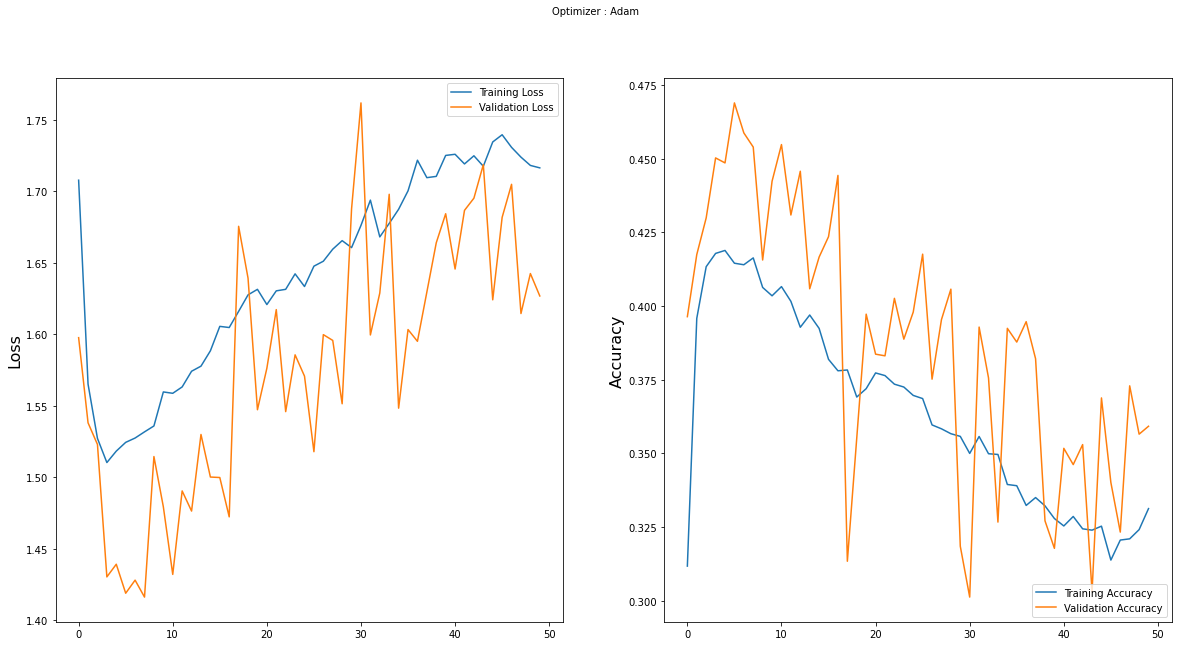

In [24]:
train(cnn_do, train_dataset, valid_dataset, 50)
cnn_do.save('cnn_do.h5')

## Try with augmented dataset

In [ ]:
train_data_aug = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=(-0.5, 0.5),
    height_shift_range=(-0.5, 0.5),
    fill_mode="nearest",
    
)

train_dataset_aug = train_data_aug.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

In [ ]:
train(cnn_do, train_dataset_aug, valid_dataset)
cnn_do.save('cnn_do_aug.h5')

## Try to use pretrained model (Resnet)

In [15]:
resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 24, 24, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [17]:
resnet.trainable = False

resnet = tf.keras.models.Sequential([
    resnet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(7, activation='softmax')
])

resnet.compile(
    optimizer='RMSProp',
    loss='categorical_crossentropy',
    metrics = ['acc']
)

resnet.summary()

In [18]:
train(resnet, train_dataset, valid_dataset)

Epoch 1/20
451/451 [==============================] - 160s 354ms/step - loss: 1.9575 - acc: 0.2272 - val_loss: 1.8868 - val_acc: 0.2913
Epoch 2/20
451/451 [==============================] - 157s 348ms/step - loss: 1.8893 - acc: 0.2538 - val_loss: 1.7490 - val_acc: 0.2649
Epoch 3/20
451/451 [==============================] - 155s 344ms/step - loss: 1.8613 - acc: 0.2671 - val_loss: 1.9469 - val_acc: 0.2147
Epoch 4/20
 72/451 [===>..........................] - ETA: 1:43 - loss: 1.8512 - acc: 0.2730

KeyboardInterrupt: 

## Try using HingeCategoricalLoss

In [10]:
cnn_do = cnn_do

cnn_do.compile(
    optimizer='RMSProp',
    loss=tf.keras.losses.CategoricalHinge(),
    metrics = ['acc']
)

cnn_do.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 46, 46, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)         

Epoch 1/20
451/451 [==============================] - 48s 106ms/step - loss: 0.8181 - acc: 0.5570 - val_loss: 0.8124 - val_acc: 0.5434
Epoch 2/20
451/451 [==============================] - 48s 107ms/step - loss: 0.7973 - acc: 0.5665 - val_loss: 0.8010 - val_acc: 0.5542
Epoch 3/20
451/451 [==============================] - 48s 106ms/step - loss: 0.7790 - acc: 0.5720 - val_loss: 0.7972 - val_acc: 0.5437
Epoch 4/20
451/451 [==============================] - 48s 107ms/step - loss: 0.7649 - acc: 0.5784 - val_loss: 0.8097 - val_acc: 0.5385
Epoch 5/20
451/451 [==============================] - 48s 106ms/step - loss: 0.7593 - acc: 0.5816 - val_loss: 0.7860 - val_acc: 0.5467
Epoch 6/20
451/451 [==============================] - 48s 106ms/step - loss: 0.7549 - acc: 0.5791 - val_loss: 0.7776 - val_acc: 0.5603
Epoch 7/20
451/451 [==============================] - 48s 107ms/step - loss: 0.7422 - acc: 0.5887 - val_loss: 0.7720 - val_acc: 0.5522
Epoch 8/20
451/451 [==============================] - 4

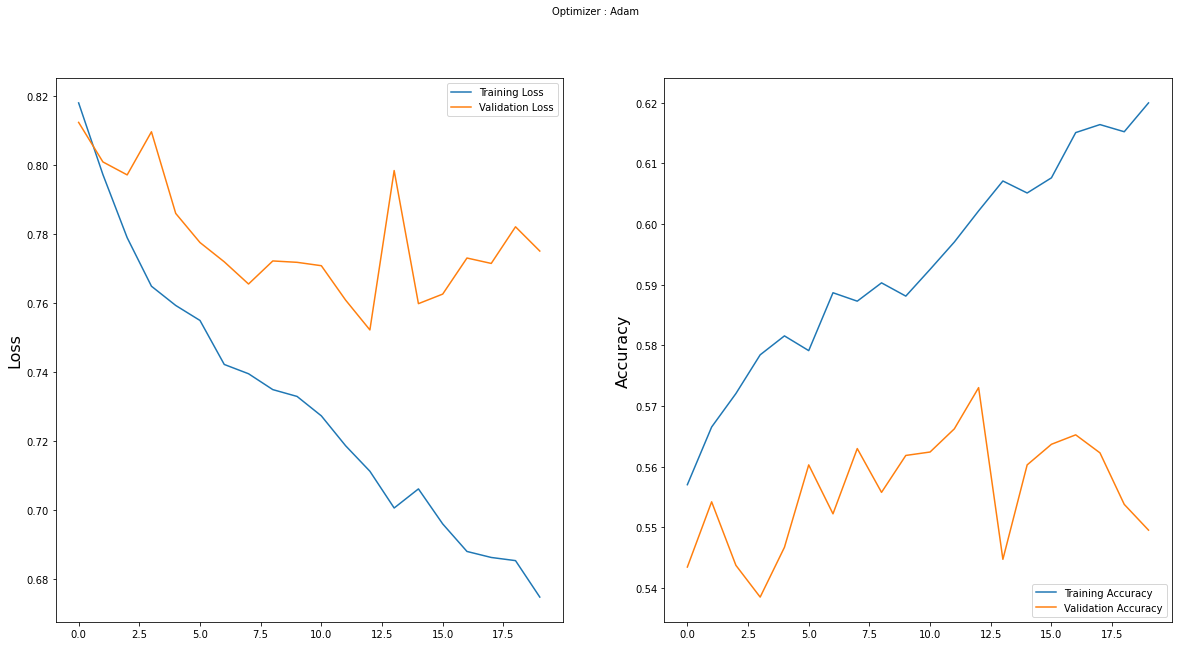

In [11]:
train(cnn_do, train_dataset, valid_dataset)

## Batch Normalization

In [20]:
cnn_bn = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    # 1024 neuron hidden layer
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(7, activation='softmax')
])


opt = tf.keras.optimizers.RMSprop(lr=1e-4)

cnn_bn.compile(
    optimizer=opt,
    loss=tf.keras.losses.CategoricalHinge(),
    metrics=['acc']
)

cnn_bn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 46, 46, 16)        448       
_________________________________________________________________
batch_normalization_30 (Batc (None, 46, 46, 16)        64        
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 21, 21, 32)        4640      
_________________________________________________________________
batch_normalization_31 (Batc (None, 21, 21, 32)        128       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 10, 10, 32)       

Epoch 1/20
451/451 [==============================] - 60s 134ms/step - loss: 1.3987 - acc: 0.2866 - val_loss: 1.3602 - val_acc: 0.3089
Epoch 2/20
451/451 [==============================] - 60s 133ms/step - loss: 1.3054 - acc: 0.3397 - val_loss: 1.3231 - val_acc: 0.3305
Epoch 3/20
451/451 [==============================] - 67s 149ms/step - loss: 1.2799 - acc: 0.3532 - val_loss: 1.2967 - val_acc: 0.3481
Epoch 4/20
451/451 [==============================] - 60s 133ms/step - loss: 1.2474 - acc: 0.3700 - val_loss: 1.3198 - val_acc: 0.3323
Epoch 5/20
451/451 [==============================] - 60s 134ms/step - loss: 1.2453 - acc: 0.3713 - val_loss: 1.3291 - val_acc: 0.3316
Epoch 6/20
451/451 [==============================] - 60s 134ms/step - loss: 1.2411 - acc: 0.3743 - val_loss: 1.4288 - val_acc: 0.2805
Epoch 7/20
451/451 [==============================] - 61s 136ms/step - loss: 1.2122 - acc: 0.3874 - val_loss: 1.1961 - val_acc: 0.3968
Epoch 8/20
451/451 [==============================] - 6

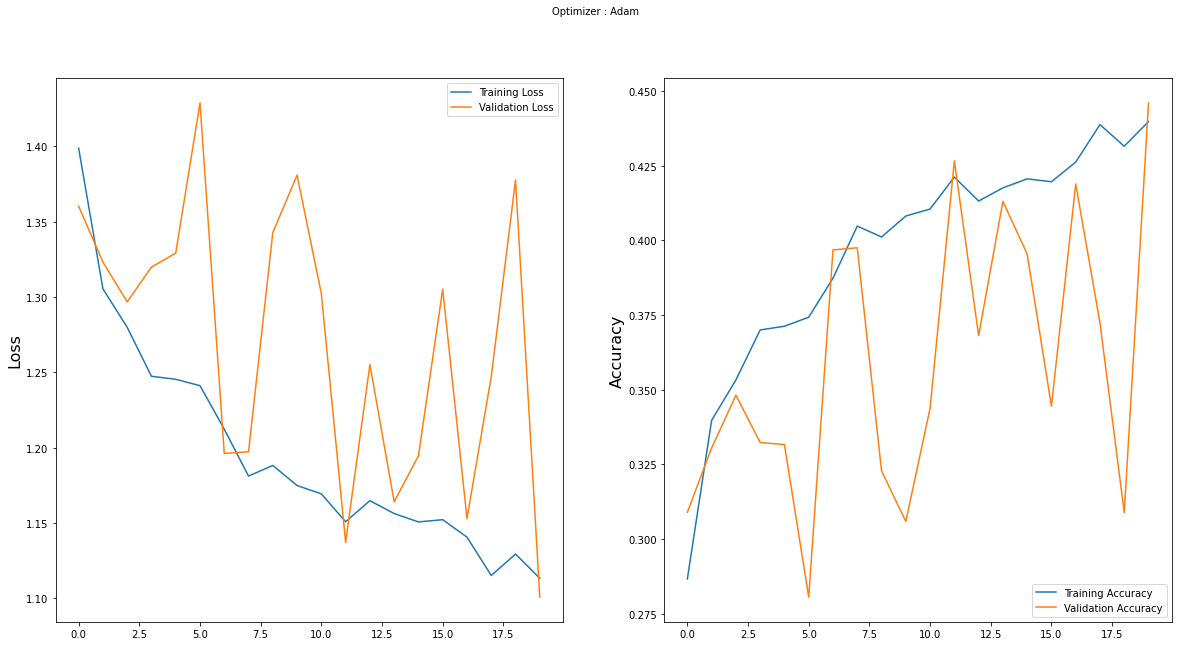

In [19]:
train(cnn_bn, train_dataset, valid_dataset, 50)
cnn_bn.save("cnn_bn.pt")

## Try different model

In [ ]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Inference function

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.image import resize
from tensorflow.image import rgb_to_grayscale
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

class Inference():
    
    labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    def __init__(self, modelpath):
        try:
            self.model = load_model(modelpath)
        except:
            print("Model not Found")

        self.inp_shape = self.model.input.shape.as_list()

    def predict(self, image):
        image = self.preprocess(image)
        pred = self.model.predict(image)
        pred = np.argmax(pred)
        return self.labels[pred]

    def preprocess(self, image):
        image = resize(image, (self.inp_shape[1], self.inp_shape[2]))
        image = rgb_to_grayscale(image)
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        return image
    
inference = Inference('./cnn_do.h5')

In [ ]:
from keras.preprocessing.image import load_img

test_image = '../input/face-expression-recognition-dataset/images/train/surprise/10007.jpg'
img = load_img(test_image)
img = tf.keras.preprocessing.image.img_to_array(img)
inference.predict(img)

In [ ]:
dummy_image = np.random.random((50,50,3))
inference = Inference('./cnn_do.h5')
print(inference.predict(dummy_image))